<a href="https://colab.research.google.com/github/BrajanNieto/n-queens/blob/main/IA_Fundamentals_NQueensProblem_BrajanNieto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**IA Fundamentals - N Queens**

*   The N-Queens problem involves placing N queens on an N×N chessboard such that no two queens can attack each other.

### Application of Hill Climbing and Simulated Annealing in the N-Queens Problem

**Professor:**  
Mg. Machaca Vicente Arceda  
[vicente.machaca.a@gmail.com](mailto:jcaballero@utec.edu.pe)

**Autor:**  
Bach. Brajan Esteban Nieto Espinoza  
[brajan.nieto@utec.edu.pe](mailto:brajan.nieto@utec.edu.pe)

<img src="https://pregrado.utec.edu.pe/sites/default/files/logo-utec-h_0_0.svg" width="190" alt="Logo UTEC" loading="lazy" typeof="foaf:Image">

**N-Queens Overview**

The N-Queens problem is a classic combinatorial challenge where the objective is to place N queens on an N×N chessboard such that no two queens can attack each other. This means ensuring that no two queens share the same row, column, or diagonal. The problem has been a significant topic in computer science and AI, serving as an example for constraint satisfaction and optimization techniques.

**Algorithms Overview**


*   **Hill Climbing:** Starts with a random solution and iteratively makes the best local move until no better move is available. Prone to getting stuck in local optima.

*   **Simulated Annealing:** Simulates the annealing process in metallurgy. By allowing random moves that may temporarily worsen the solution, it seeks to overcome local optima and find a global solution.

### <b>1.1 Brute Force - All Solutions </b> (Solves the problem by trying all possible arrangements.)

In [54]:
def solve_n_queens(n):
    soluciones = []
    tablero = [-1] * n

    def es_valido(fila, columna): #Si la posición es válida (es decir, la reina no es atacada por ninguna otra reina ya colocada en el tablero), se procede con la colocación.
        for i in range(fila):
            if (tablero[i] == columna or
                tablero[i] - i == columna - fila or
                tablero[i] + i == columna + fila):
                return False
        return True

    def colocar_reina(fila):
        if fila == n:
            soluciones.append(tablero.copy())
        else:
            for columna in range(n):
                if es_valido(fila, columna):
                    tablero[fila] = columna
                    colocar_reina(fila + 1)
                    tablero[fila] = -1

    colocar_reina(0)
    return soluciones



In [59]:
def max_reinas(n):
    for k in range(n, 0, -1):
        soluciones = solve_n_queens_variable(k, n)
        if soluciones:
            return k, soluciones
    return 0, []

def solve_n_queens_variable(k, n):
    soluciones = []
    tablero = [-1] * k

    def es_valido(fila, columna):
        for i in range(fila):
            if (tablero[i] == columna or
                tablero[i] - i == columna - fila or
                tablero[i] + i == columna + fila):
                return False
        return True

    def colocar_reina(fila):
        if fila == k:
            soluciones.append(tablero.copy())
        else:
            for columna in range(n):
                if es_valido(fila, columna):
                    tablero[fila] = columna
                    colocar_reina(fila + 1)
                    tablero[fila] = -1

    colocar_reina(0)
    return soluciones


In [55]:
def contar_soluciones_unicas(soluciones):
    soluciones_unicas = []

    for solucion in soluciones:
        # Generamos todas las transformaciones simétricas de la solución
        transformaciones = generar_transformaciones(solucion)

        # Convertimos las transformaciones a tuplas para poder almacenarlas en una lista
        transformaciones_tuplas = [tuple(t) for t in transformaciones]

        # Verificamos si alguna de las transformaciones ya está en nuestras soluciones únicas
        if not any(t in soluciones_unicas for t in transformaciones_tuplas):
            soluciones_unicas.append(tuple(solucion))

    return len(soluciones_unicas)

def generar_transformaciones(solucion):
    n = len(solucion)
    transformaciones = []

    # Funciones de transformación
    def rotar_90(sol):
        return [n - 1 - sol.index(i) for i in range(n)]

    def rotar_180(sol):
        return [n - 1 - i for i in sol[::-1]]

    def rotar_270(sol):
        return [sol.index(n - 1 - i) for i in range(n)]

    def reflejar_horizontal(sol):
        return sol[::-1]

    def reflejar_vertical(sol):
        return [n - 1 - i for i in sol]

    def reflejar_diagonal(sol):
        return [sol.index(i) for i in range(n)]

    def reflejar_antidiagonal(sol):
        return [n - 1 - sol.index(n - 1 - i) for i in range(n)]

    # Lista de todas las transformaciones
    transformaciones.append(solucion)
    transformaciones.append(rotar_90(solucion))
    transformaciones.append(rotar_180(solucion))
    transformaciones.append(rotar_270(solucion))
    transformaciones.append(reflejar_horizontal(solucion))
    transformaciones.append(reflejar_vertical(solucion))
    transformaciones.append(reflejar_diagonal(solucion))
    transformaciones.append(reflejar_antidiagonal(solucion))

    return transformaciones


In [61]:
n = int(input("Introduce el tamaño del tablero (n): "))
soluciones = solve_n_queens(n)
soluciones_unicas = contar_soluciones_unicas(soluciones)

print(f"\nSe encontraron {len(soluciones)} soluciones y {soluciones_unicas} soluciones únicas para un tablero de tamaño {n}x{n} ")

Introduce el tamaño del tablero (n): 8

Se encontraron 92 soluciones y 12 soluciones únicas para un tablero de tamaño 8x8 


In [67]:
n=11
max_k, soluciones = max_reinas(n)
print(f"La cantidad máxima de reinas para un tablero de {n}x{n} es: {max_k}")


La cantidad máxima de reinas para un tablero de 11x11 es: 11


In [14]:
for idx, solucion in enumerate(soluciones):
    print(f"\nSolución {idx + 1}:")
    for i in range(n):
        fila = ['.'] * n
        fila[solucion[i]] = 'Q'
        print(' '.join(fila))


Solución 1:
Q . . . . . . . .
. . Q . . . . . .
. . . . . Q . . .
. . . . . . . Q .
. Q . . . . . . .
. . . Q . . . . .
. . . . . . . . Q
. . . . . . Q . .
. . . . Q . . . .

Solución 2:
Q . . . . . . . .
. . Q . . . . . .
. . . . . . Q . .
. Q . . . . . . .
. . . . . . . Q .
. . . . Q . . . .
. . . . . . . . Q
. . . Q . . . . .
. . . . . Q . . .

Solución 3:
Q . . . . . . . .
. . Q . . . . . .
. . . . . . . Q .
. . . . . Q . . .
. . . . . . . . Q
. Q . . . . . . .
. . . . Q . . . .
. . . . . . Q . .
. . . Q . . . . .

Solución 4:
Q . . . . . . . .
. . . Q . . . . .
. Q . . . . . . .
. . . . . . . Q .
. . . . . Q . . .
. . . . . . . . Q
. . Q . . . . . .
. . . . Q . . . .
. . . . . . Q . .

Solución 5:
Q . . . . . . . .
. . . Q . . . . .
. . . . . Q . . .
. . Q . . . . . .
. . . . . . . . Q
. Q . . . . . . .
. . . . . . . Q .
. . . . Q . . . .
. . . . . . Q . .

Solución 6:
Q . . . . . . . .
. . . Q . . . . .
. . . . . Q . . .
. . . . . . . Q .
. Q . . . . . . .
. . . . Q . . . .
. . 

In [28]:
import time

def tiempo_solucion(n_values):
    print("{:<5} {:<20} {:<20} {:<20}".format('N', 'Total de soluciones', 'Soluciones únicas', 'Tiempo de ejecución (s)'))
    for n in n_values:
        start_time = time.time()
        soluciones = solve_n_queens(n)
        end_time = time.time()
        total_solutions = len(soluciones)
        unique_solutions = contar_soluciones_unicas(soluciones)
        execution_time = end_time - start_time
        print("{:<5} {:<20} {:<20} {:<20.4f}".format(n, total_solutions, unique_solutions, execution_time))

In [42]:
import time
import pandas as pd

def tiempo_solucion(n_values):
    # Lista para almacenar los datos
    datos = []

    # Imprimir encabezados
    #print("{:<5} {:<20} {:<20} {:<20}".format('N', 'Total de soluciones', 'Soluciones únicas', 'Tiempo de ejecución (s)'))

    for n in n_values:
        start_time = time.time()
        soluciones = solve_n_queens(n)
        end_time = time.time()

        total_solutions = len(soluciones)
        unique_solutions = contar_soluciones_unicas(soluciones)
        execution_time = end_time - start_time

        # Imprimir cada fila
        #print("{:<5} {:<20} {:<20} {:<20.4f}".format(n, total_solutions, unique_solutions, execution_time))

        # Agregar los datos a la lista
        datos.append({
            'N': n,
            'Total de soluciones': total_solutions,
            'Soluciones únicas': unique_solutions,
            'Tiempo de ejecución (s)': execution_time
        })

    return datos


In [ ]:
import matplotlib.pyplot as plt
def generar_tabla_y_graficos(df):
    # Configurar los gráficos
    plt.figure(figsize=(15, 5))

    # Gráfico 1: Total de soluciones vs N
    plt.subplot(1, 3, 1)
    plt.plot(df['N'], df['Total de soluciones'], marker='o', linestyle='-', color='b')
    plt.title('Total de Soluciones vs N')
    plt.xlabel('N')
    plt.ylabel('Total de soluciones')
    plt.grid(True)

    # Gráfico 2: Soluciones únicas vs N
    plt.subplot(1, 3, 2)
    plt.plot(df['N'], df['Soluciones únicas'], marker='s', linestyle='-', color='g')
    plt.title('Soluciones Únicas vs N')
    plt.xlabel('N')
    plt.ylabel('Soluciones únicas')
    plt.grid(True)

    # Gráfico 3: Tiempo de ejecución vs N
    plt.subplot(1, 3, 3)
    plt.plot(df['N'], df['Tiempo de ejecución (s)'], marker='^', linestyle='-', color='r')
    plt.title('Tiempo de Ejecución vs N')
    plt.xlabel('N')
    plt.ylabel('Tiempo de ejecución (s)')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

In [46]:
# Valores de N para los que deseas calcular las soluciones
n_values = [2, 3, 4, 5, 6, 8, 9, 10, 11,12,13]

# Generar los datos
datos_generados = tiempo_solucion(n_values)

# Crear el DataFrame
tiempos_tabla = pd.DataFrame(datos_generados)

# Mostrar el DataFrame
print(tiempos_tabla)


     N  Total de soluciones  Soluciones únicas  Tiempo de ejecución (s)
0    2                    0                  0                 0.000017
1    3                    0                  0                 0.000020
2    4                    2                  1                 0.000052
3    5                   10                  2                 0.000178
4    6                    4                  1                 0.000614
5    8                   92                 12                 0.016798
6    9                  352                 46                 0.067594
7   10                  724                 92                 0.363974
8   11                 2680                341                 2.028447
9   12                14200               1787                13.319928
10  13                73712               9233                84.071797


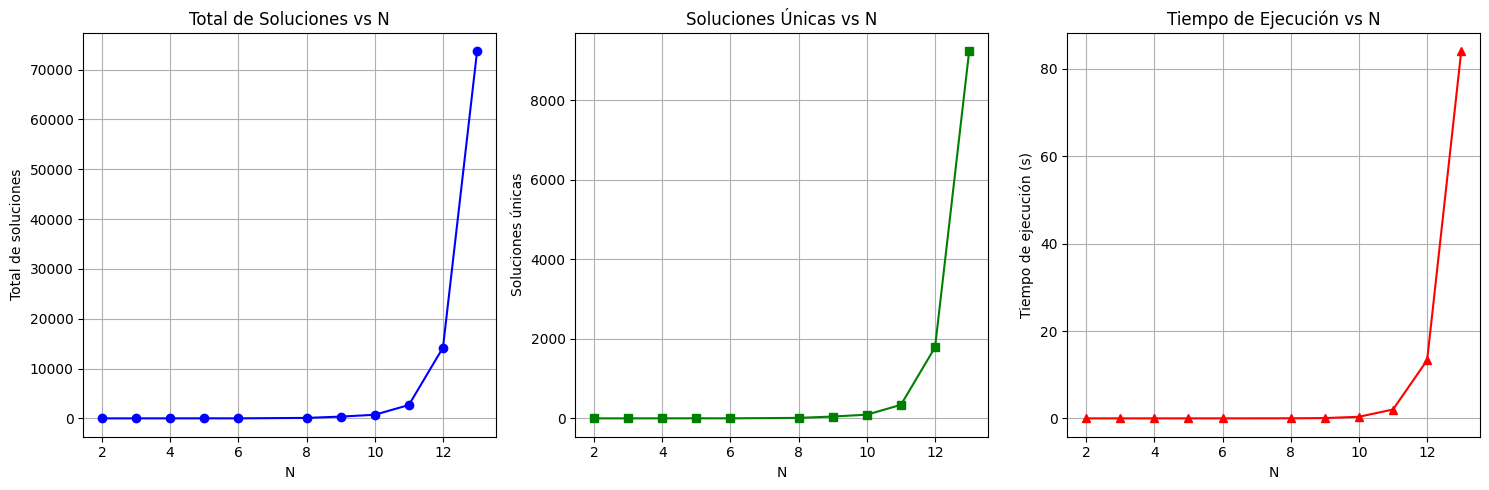

In [47]:
generar_tabla_y_graficos(tiempos_tabla)

### <b>1.2 Brute Force - First Solution </b> (Solves the problem by trying all possible arrangements until the first valid solution is found.)

### <b>2. Hill Climbing </b> (Solves the problem by starting with an initial solution and iteratively making the best local change to improve it.)

In [48]:
import random

def solve_n_reinas_hill_climbing(n):
    # Inicializar el tablero con una reina en cada fila, en una columna aleatoria
    tablero = [random.randint(0, n - 1) for _ in range(n)]

    def heuristica(tablero):
        conflictos = 0
        for i in range(n):
            for j in range(i + 1, n):
                if tablero[i] == tablero[j] or abs(tablero[i] - tablero[j]) == abs(i - j):
                    conflictos += 1
        return conflictos

    heur_actual = heuristica(tablero)

    while True:
        vecinos = []
        heur_vecinos = []
        # Generar vecinos cambiando la posición de una reina en su fila
        for fila in range(n):
            for columna in range(n):
                if columna != tablero[fila]:
                    nuevo_tablero = tablero.copy()
                    nuevo_tablero[fila] = columna
                    heur = heuristica(nuevo_tablero)
                    vecinos.append(nuevo_tablero)
                    heur_vecinos.append(heur)
        # Encontrar el vecino con menor heurística
        min_heur = min(heur_vecinos)
        if min_heur >= heur_actual:
            # Se alcanzó un mínimo local
            break
        else:
            indice = heur_vecinos.index(min_heur)
            tablero = vecinos[indice]
            heur_actual = min_heur

    if heur_actual == 0:
        return tablero  # Solución encontrada
    else:
        return None  # No se encontró solución


In [70]:
import random

def solve_n_reinas_hill_climbing(n, max_intentos=1000):
    intentos = 0
    while intentos < max_intentos:
        # Inicializar el tablero con una reina en cada fila, en una columna aleatoria
        tablero = [random.randint(0, n - 1) for _ in range(n)]

        def heuristica(tablero):
            conflictos = 0
            for i in range(n):
                for j in range(i + 1, n):
                    if tablero[i] == tablero[j] or abs(tablero[i] - tablero[j]) == abs(i - j):
                        conflictos += 1
            return conflictos

        heur_actual = heuristica(tablero)

        while True:
            if heur_actual == 0:
                return tablero  # Solución encontrada

            vecinos = []
            heur_vecinos = []
            # Generar vecinos cambiando la posición de una reina en su fila
            for fila in range(n):
                for columna in range(n):
                    if columna != tablero[fila]:
                        nuevo_tablero = tablero.copy()
                        nuevo_tablero[fila] = columna
                        heur = heuristica(nuevo_tablero)
                        vecinos.append(nuevo_tablero)
                        heur_vecinos.append(heur)
            # Encontrar el vecino con menor heurística
            min_heur = min(heur_vecinos)
            if min_heur >= heur_actual:
                # Se alcanzó un mínimo local, reiniciar con una nueva configuración
                break
            else:
                indice = heur_vecinos.index(min_heur)
                tablero = vecinos[indice]
                heur_actual = min_heur

        intentos += 1

    return None  # No se encontró solución después de varios intentos

In [72]:
n = 30
solucion_hill_climbing = solve_n_reinas_hill_climbing(n)
if solucion_hill_climbing:
    print("Solución encontrada con Hill Climbing:", solucion_hill_climbing)
else:
    print("No se encontró solución con Hill Climbing.")


Solución encontrada con Hill Climbing: [12, 3, 9, 20, 18, 27, 25, 13, 1, 6, 28, 24, 17, 23, 10, 26, 2, 4, 7, 11, 14, 19, 21, 5, 15, 8, 0, 22, 16, 29]


### <b>3. Simulated Annealing </b> (Solves the problem by exploring solutions and occasionally accepting worse solutions to escape local optima, gradually reducing the probability of such moves over time to find a global solution.t.)

In [51]:
import random
import math

def solve_n_reinas_simulated_annealing(n):
    # Inicializar el tablero con una reina en cada fila, en una columna aleatoria
    tablero = [random.randint(0, n - 1) for _ in range(n)]

    def heuristica(tablero):
        conflictos = 0
        for i in range(n):
            for j in range(i + 1, n):
                if tablero[i] == tablero[j] or abs(tablero[i] - tablero[j]) == abs(i - j):
                    conflictos += 1
        return conflictos

    temperatura = 1000.0
    enfriamiento = 0.99
    min_temperatura = 0.1
    heur_actual = heuristica(tablero)

    while temperatura > min_temperatura and heur_actual > 0:
        # Seleccionar una reina al azar y moverla a una columna aleatoria
        fila = random.randint(0, n - 1)
        columna = random.randint(0, n - 1)
        tablero_nuevo = tablero.copy()
        tablero_nuevo[fila] = columna
        heur_nueva = heuristica(tablero_nuevo)
        delta_heur = heur_nueva - heur_actual
        # Decidir si se acepta el nuevo estado
        if delta_heur < 0 or random.uniform(0, 1) < math.exp(-delta_heur / temperatura):
            tablero = tablero_nuevo
            heur_actual = heur_nueva
        # Enfriar la temperatura
        temperatura *= enfriamiento

    if heur_actual == 0:
        return tablero  # Solución encontrada
    else:
        return None  # No se encontró solución


In [53]:
solucion_simulated_annealing = solve_n_reinas_simulated_annealing(n)
if solucion_simulated_annealing:
    print("Solución encontrada con Simulated Annealing:", solucion_simulated_annealing)
else:
    print("No se encontró solución con Simulated Annealing.")

Solución encontrada con Simulated Annealing: [6, 1, 3, 0, 7, 4, 2, 5]
